<a href="https://colab.research.google.com/github/Dharma-Ranganathan/AllAboutPython/blob/main/ML_Projects_Codes/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loan Approval Prediction using Support Vector Machine Algorithm

Overview :

1. Dependencies
2. Data collection
3. Data Pre-processing
4. Model Selection
5. Model Tuning
6. Model Evaluation

Dependencies

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

Data collection

In [3]:
# dataset

loan = pd.read_csv('/content/drive/MyDrive/Colab_python/loan_dataset.csv')

In [4]:
# checking if dataset loaded

loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Pre-processing

In [5]:
# checking shape of dataset

loan.shape

(614, 13)

In [6]:
# checking if dataset contains null values

loan.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


* lot of null values exists in way of categorical data
* We are going to drop rows of null values since we have only small num of null values

In [7]:
# handling null values by dropping

loan = loan.dropna(axis=0)

In [8]:
# shape of dataset

loan.shape

(480, 13)

In [9]:
# checking null values exists

loan.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


* we don't have any null values rows now

In [10]:
# checking if dataset contains balanced state

loan.value_counts('Loan_Status')

,count
Loan_Status,
Y,332
N,148


* our dataset is in more or less balanced state, so no worries

In [11]:
# features and label splitting

features = loan.drop(columns=['Loan_ID','Loan_Status'],axis=1)
label = loan['Loan_Status']

# checking features

print(features)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
5      Male     Yes          2      Graduate           Yes             5417   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [12]:
# checking label

print(label)

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object


Encoding label and feature to get rid of categorical data

In [13]:
# Label Encoding

encoder = LabelEncoder()

label = encoder.fit_transform(label)

print(label)

[0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]


Label Encoding does sorting by alphabet and number it from 0 to any

Y,N --> sorting : N,Y --> numbering : 0,1

* N - 0
* Y - 1

In [14]:
# feature replacing of categorical data

features.replace({
'Gender':{'Male':0,'Female':1},
'Married':{'No':0,'Yes':1},
'Education':{'Not Graduate':0,'Graduate':1},
'Self_Employed':{'No':0,'Yes':1},
'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}
},inplace=True)

features.head()

/tmp/ipython-input-1210687153.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features.replace({


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2


In [15]:
# checking property area counts

features.value_counts('Property_Area')

,count
Property_Area,
1,191
2,150
0,139


In [16]:
# checking dependents counts

features.value_counts('Dependents')

,count
Dependents,
0,274
2,85
1,80
3+,41


* In dependents , we may notice '3+' as printed, we don't need it like the way it is, so we are replacing '3+' to 4

In [17]:
# replacing 3+ to 4 in dependents

features.replace(to_replace = '3+', value = 4, inplace=True)

In [18]:
# checking dependents again

features.value_counts('Dependents')

,count
Dependents,
0,274
2,85
1,80
4,41


Final checking of features and label

In [19]:
features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2


In [20]:
print(label[:5])

[0 1 1 1 1]


Data visualization

<Axes: xlabel='Gender', ylabel='count'>

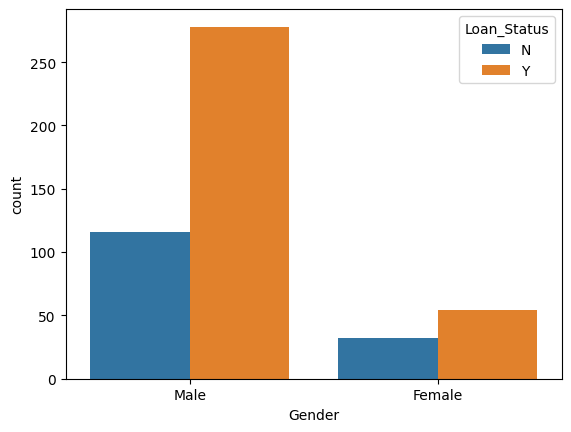

In [21]:
# counts of gender vs loan status

sns.countplot(x='Gender',hue='Loan_Status',data=loan)

* we may notice, male has acquired more loan approval then rest

<Axes: xlabel='Married', ylabel='count'>

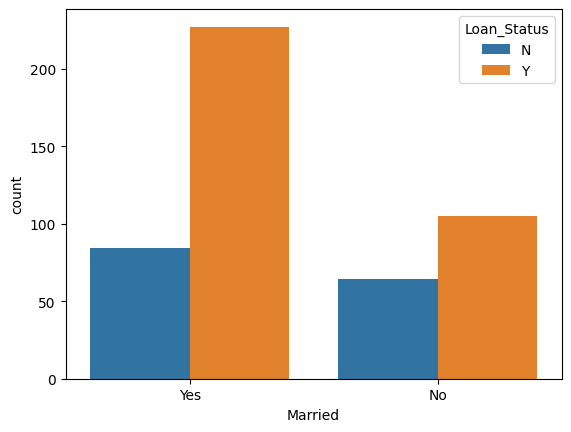

In [22]:
# counts of married vs loan status

sns.countplot(x='Married',hue='Loan_Status',data=loan)

* also, couple married has acquired more loan approval then rest

<Axes: xlabel='Education', ylabel='count'>

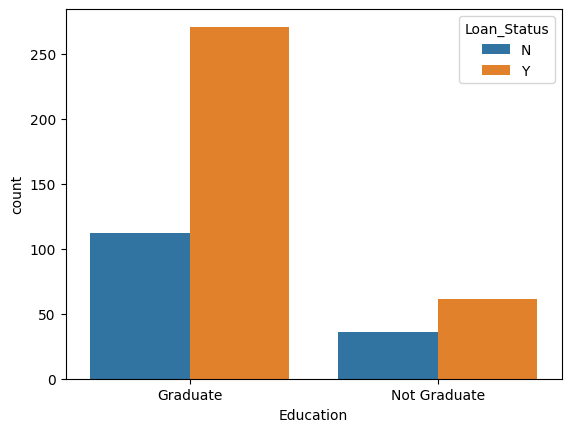

In [23]:
# counts of educated vs loan status

sns.countplot(x='Education',hue='Loan_Status',data=loan)

* okay we got an idea by basic eda we have done so far, which is,

* Married Men with Graduated has acquired more loan approval then rest. Nice catch.

Model Selection

In [24]:
# splitting Training and Testing data

x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2, stratify=label, random_state=3)

In [25]:
# shape of training and testing data

print(features.shape,x_train.shape,x_test.shape)

(480, 11) (384, 11) (96, 11)


* 96 for testing out of 480
* 384 for training out of 480

In [26]:
# support vector machine model - linear kernel
# linear for continuous dataset

classifier = SVC(kernel = 'linear')

Model Tuning

In [27]:
# fitting training data to model

classifier.fit(x_train,y_train)

SVC(kernel='linear')

* time taken during model tuning is around 3 mins.

Model Evaluation

In [28]:
# prediction of trained data

x_train_pred = classifier.predict(x_train)

# accuracy

x_train_score = accuracy_score(x_train_pred,y_train)

print(f"accuracy of X trained : {x_train_score:.4f}")
print(f'percentage : {(x_train_score * 100):.2f} %')
print(f'out of {x_train.shape[0]}, {(x_train_score * x_train.shape[0]):.0f} were accurate')

accuracy of X trained : 0.7604
percentage : 76.04 %
out of 384, 292 were accurate


In [29]:
# prediction of test data - unseen

x_test_pred = classifier.predict(x_test)

# accuracy

x_test_score = accuracy_score(x_test_pred,y_test)

print(f"accuracy of X test : {x_test_score:.4f}")
print(f'percentage : {(x_test_score * 100):.2f} %')
print(f'out of {x_test.shape[0]}, {(x_test_score * x_test.shape[0]):.0f} were accurate')

accuracy of X test : 0.7812
percentage : 78.12 %
out of 96, 75 were accurate


<Axes: >

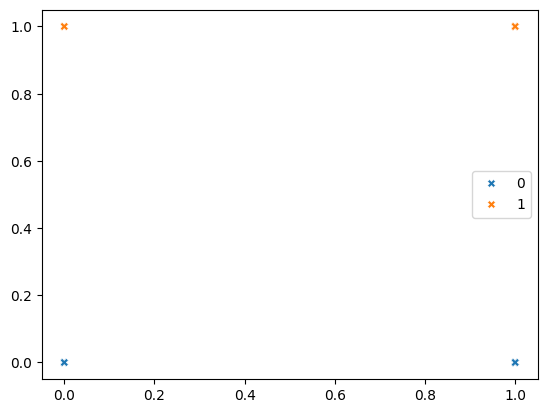

In [30]:
# data visualization of results on unseen data

sns.scatterplot(x=x_test_pred,y=y_test,hue=y_test,marker='X')

* we may notice by plot of unseen data prediction,
* Both prediction and actual were almost plotted in same points
* Which states that our model has acquired an accurate level

In [31]:
# classification reports on unseen data

reports = classification_report(x_test_pred,y_test)

# checking

print(reports)

              precision    recall  f1-score   support

           0       0.37      0.85      0.51        13
           1       0.97      0.77      0.86        83

    accuracy                           0.78        96
   macro avg       0.67      0.81      0.69        96
weighted avg       0.89      0.78      0.81        96



Thank you ...